### Mean,    Medain,    Mode

In [8]:
import numpy as np
import pandas as pd

In [10]:
df = pd.DataFrame({"X":[1,2,3,4,5]})
df

,X
0,1
1,2
2,3
3,4
4,5


In [12]:
df["X"].mean()

3.0

In [14]:
df["X"].sum()/len(df)

3.0

In [16]:
df = pd.DataFrame({"X":[2,4,8,12,16,89,54,23,21]})
df

,X
0,2
1,4
2,8
3,12
4,16
5,89
6,54
7,23
8,21


In [18]:
df["X"].median()

16.0

In [20]:
df = pd.DataFrame({"Y":[2,4,6,8,12,4,15,62,48,75,15]})
df

,Y
0,2
1,4
2,6
3,8
4,12
5,4
6,15
7,62
8,48
9,75


In [22]:
df["Y"].median()

12.0

In [24]:
df = pd.DataFrame({"X":[1,1,2,2,2,3,4,4,5,],
                  "Y":[1,2,3,3,4,2,5,5,1],
                  "Z":[1,1,1,1,2,3,4,5,5],
                  "i":[1,2,2,3,3,4,5,5,4]})
df

,X,Y,Z,i
0,1,1,1,1
1,1,2,1,2
2,2,3,1,2
3,2,3,1,3
4,2,4,2,3
5,3,2,3,4
6,4,5,4,5
7,4,5,5,5
8,5,1,5,4


In [26]:
df["X"].mode()

0    2
Name: X, dtype: int64

In [28]:
df["Y"].mode()

0    1
1    2
2    3
3    5
Name: Y, dtype: int64

In [30]:
df["Z"].mode()

0    1
Name: Z, dtype: int64

In [32]:
df["i"].mode()

0    2
1    3
2    4
3    5
Name: i, dtype: int64

#### Range,IQR,Variance,std.deviation

In [35]:
df = pd.DataFrame({"X":[1,2,3,4,5]})
df

,X
0,1
1,2
2,3
3,4
4,5


In [37]:
df["X"].min()

1

In [39]:
df["X"].max()

5

In [41]:
df["X"].max()-df["X"].min()

4

In [43]:
df["X-u"] = df["X"] - df["X"].mean()
df

,X,X-u
0,1,-2.0
1,2,-1.0
2,3,0.0
3,4,1.0
4,5,2.0


In [45]:
df["X-u"].mean()

0.0

In [47]:
df["X"].var(ddof=0)

2.0

In [49]:
df["X"].std(ddof=0)

1.4142135623730951

In [51]:
df["X"].std(ddof = 1)

1.5811388300841898

In [53]:
df["X"].var(ddof = 1)

2.5

In [55]:
df["X"].std(ddof = 0)/df["X"].mean()

0.47140452079103173

#### Percentile

In [58]:
df = pd.DataFrame({"X":[2,4,6,8,12,4,15,62,48,75,15,24,26,27,18,38,45,46,41,42,43,125]})
df

,X
0,2
1,4
2,6
3,8
4,12
5,4
6,15
7,62
8,48
9,75


In [60]:
# if the minimum value in column "X" is 2.0,
# it means that there are no values less than 2.0 in that column.
df["X"].quantile(0)

2.0

In [62]:
Q1 = df["X"].quantile(0.25)
Q1

12.75

In [64]:
Q2 = df["X"].quantile(0.50)
Q2

26.5

In [66]:
Q3 = df["X"].quantile(0.75)
Q3

44.5

In [68]:
df["X"].quantile(1)

125.0

In [70]:
IQR = Q3 - Q1
IQR

31.75

In [72]:
ll = Q1 - (1.5*IQR)
ll

-34.875

In [74]:
ul = Q3 + (1.5*IQR)
ul

92.125

# Matplotlib

### outlier

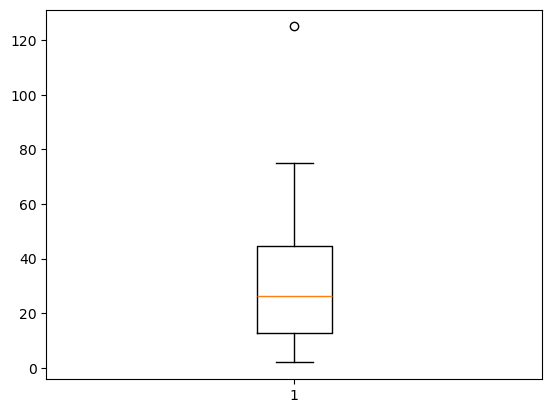

In [78]:
import matplotlib.pyplot as plt
plt.boxplot(df["X"])
plt.show()

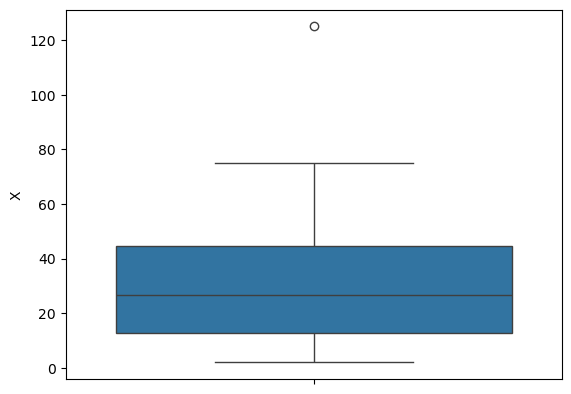

In [80]:
import seaborn as sns
sns.boxplot(y = df["X"])
plt.show()

In [81]:
df[(df["X"]<ll) | (df["X"]>ul)]

,X
21,125


In [84]:
df = pd.DataFrame({
    "Gender": ["F", "F", "F", "F", "M", "M", "F", "M", "F", "F", "F", "F", "M", "M", "F", "M"],
    "Marks": [30, 41, 42, 51, 52, 53, 61, 62, 68, 69, 77, 78, 79, 88, 89, 100],
    "no_of_assignments": [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]})
df

,Gender,Marks,no_of_assignments
0,F,30,1
1,F,41,1
2,F,42,1
3,F,51,1
4,M,52,2
5,M,53,2
6,F,61,2
7,M,62,3
8,F,68,3
9,F,69,3


In [86]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [88]:
df["Gender"].value_counts()

Gender
F    10
M     6
Name: count, dtype: int64

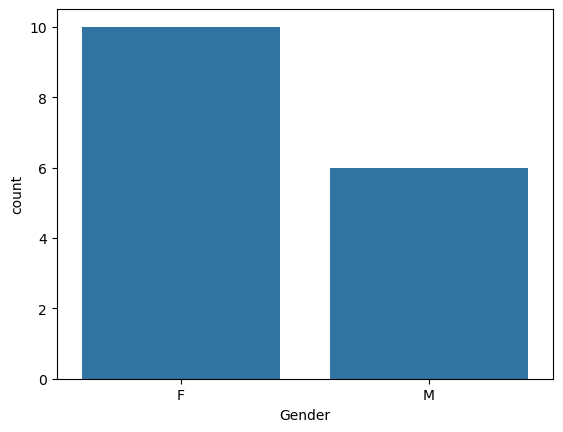

In [90]:
sns.countplot(x = df["Gender"])
plt.show()

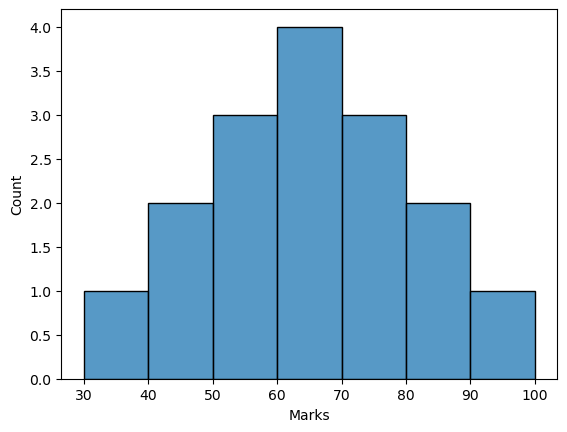

In [107]:
sns.histplot(df["Marks"],bins=7,stat="count")
plt.show()

In [120]:
df["Gender"].value_counts()/len(df)

Gender
F    0.625
M    0.375
Name: count, dtype: float64

In [126]:
df["Gender"].value_counts(normalize = True)

Gender
F    0.625
M    0.375
Name: proportion, dtype: float64

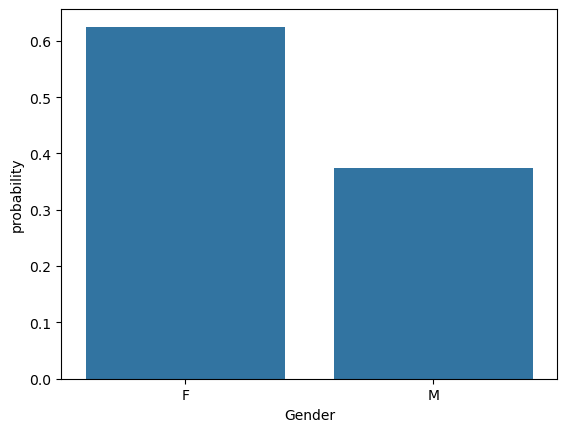

In [150]:
sns.countplot(x=df["Gender"],stat="probability")
plt.show()

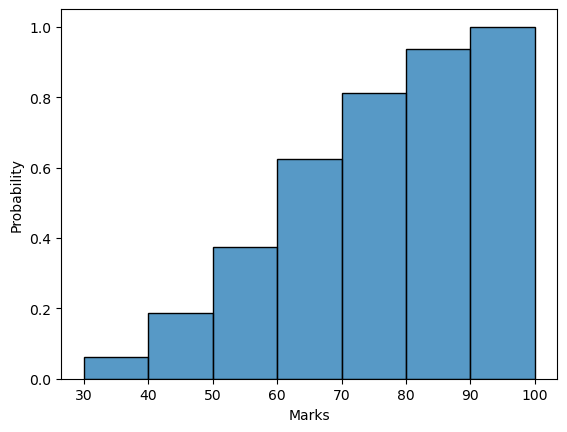

In [160]:
sns.histplot(df["Marks"],bins=7,stat="probability",cumulative=True)
plt.show()

In [162]:
df = pd.DataFrame({"X":[1,2,3,4,5]})
df

,X
0,1
1,2
2,3
3,4
4,5


In [166]:
df["X"].skew()

0.0

In [168]:
df = pd.DataFrame({
    "X": [0, 11, 12, 21, 22, 23, 31, 32, 38, 39, 47, 48, 49, 58, 59, 70],
    "Y": [0, 11, 12, 21, 22, 23, 24, 28, 29, 33, 34, 35, 37, 44, 59, 70],
    "Z": [0, 11, 12, 21, 22, 23, 34, 38, 49, 43, 44, 45, 47, 54, 59, 70]
})
df

,X,Y,Z
0,0,0,0
1,11,11,11
2,12,12,12
3,21,21,21
4,22,22,22
5,23,23,23
6,31,24,34
7,32,28,38
8,38,29,49
9,39,33,43


In [176]:
print("Mean of X :",df["X"].mean())
print("Median of X :",df["X"].median())
print("skewnes of X :",df["X"].skew())

Mean of X : 35.0
Median of X : 35.0
skewnes of X : 0.0


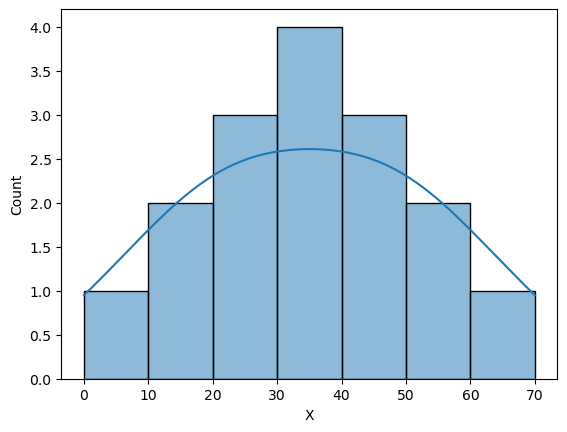

In [180]:
sns.histplot(df["X"],bins=7,kde=True)
plt.show()

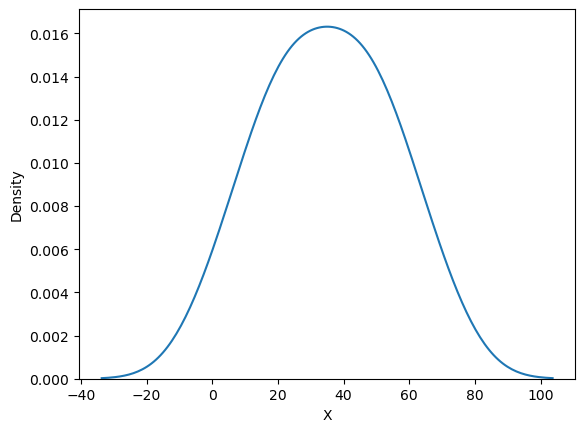

In [182]:
sns.kdeplot(df["X"])
plt.show()

Mean of Y : 30.125
Median of Y : 28.5
skewnes of Y : 0.6978985152470283


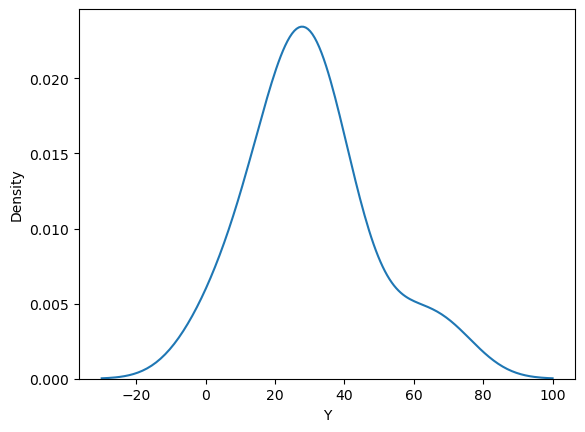

In [188]:
print("Mean of Y :",df["Y"].mean())
print("Median of Y :",df["Y"].median())
print("skewnes of Y :",df["Y"].skew())

sns.kdeplot(df["Y"])
plt.show()

Mean of Z : 35.75
Median of Z : 40.5
skewnes of Z : -0.18882851815445098


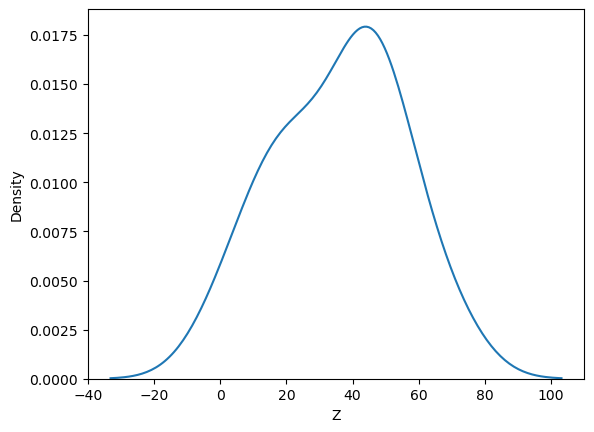

In [190]:
print("Mean of Z :",df["Z"].mean())
print("Median of Z :",df["Z"].median())
print("skewnes of Z :",df["Z"].skew())

sns.kdeplot(df["Z"])
plt.show()

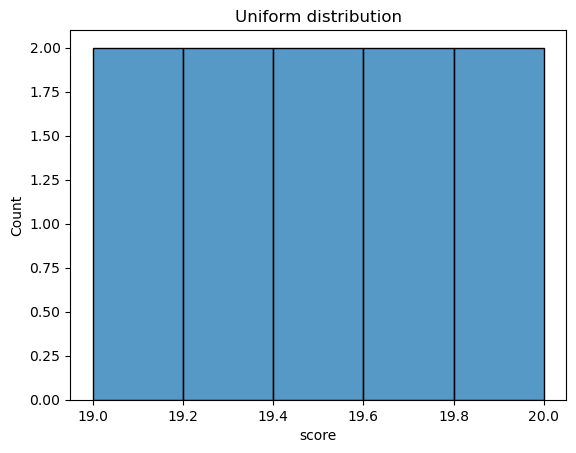

In [196]:
ds1 = pd.DataFrame({"score":[19, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 20]})

sns.histplot(ds1["score"])
plt.title("Uniform distribution")
plt.show()

In [206]:
Zvalue = (49-60)/10
Zvalue

-1.1

In [208]:
from scipy import stats
stats.norm.cdf(Zvalue)

0.13566606094638267

In [210]:
Z1 = (5.81-5.5)/0.5
p1 = stats.norm.cdf(Z1)
print("probability of students less than 5.81:",p1)

probability of students less than 5.81 0.7323711065310168


In [212]:
Z2 = (6.3-5.5)/0.5
p2 = stats.norm.cdf(Z2)
print("probability of students less than 6.3:",p2)

probability of students less than 6.3: 0.945200708300442


In [214]:
final = p2-p1
print("probability of students between 5.81 & 6.3:",final)

probability of students between 5.81 & 6.3: 0.21282960176942523


In [216]:
from scipy import stats
stats.norm.cdf(-1.34)

0.09012267246445244

In [218]:
from scipy import stats
stats.norm.ppf(0.99)

2.3263478740408408

In [220]:
import pandas as pd

In [222]:
df = pd.DataFrame({"X": [11, 22, 13, 24, 30], 
                   "Y": [10, 9, 8, 7, 6], 
                   "Z": [18, 19, 21, 22, 40]})
df

,X,Y,Z
0,11,10,18
1,22,9,19
2,13,8,21
3,24,7,22
4,30,6,40


In [226]:
df.cov()

,X,Y,Z
X,62.50,-10.00,54.25
Y,-10.00,2.50,-11.75
Z,54.25,-11.75,82.50


In [228]:
df.corr()

,X,Y,Z
X,1.000000,-0.800000,0.755497
Y,-0.800000,1.000000,-0.818165
Z,0.755497,-0.818165,1.000000
